# Импорт библиотек и датасетов

In [1]:
import pandas as pd
df = pd.read_csv("data/df_before_norm.csv")
df_norm = pd.read_csv("data/df_norm.csv")

# Создание нейронной сети

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
Y = df['Соотношение матрица-наполнитель']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [5]:
print( X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(645, 12)
(277, 12)
(645,)
(277,)


In [6]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

In [7]:
model = keras.Sequential([
      normalizer,
      layers.Dense(64,activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))


In [11]:
import matplotlib.pyplot as plt
def plot_loss(model_fit):
    plt.figure(figsize = (10, 4))
    plt.style.use('ggplot')
    plt.plot(model_fit.history['loss'], label='loss')
    plt.plot(model_fit.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.ylim(0,2)
    plt.legend()
    plt.grid(True)

In [9]:
model_fit = model.fit(
    X_train,
    Y_train,
    validation_split = 0.2,
    verbose=0, epochs=250)

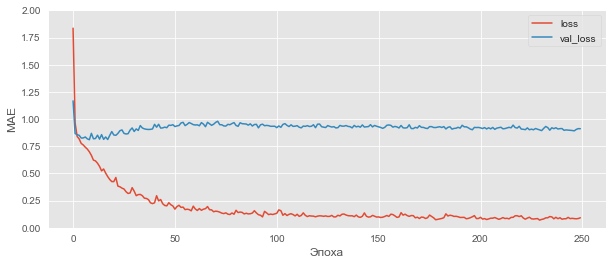

In [17]:
plot_loss(model_fit)

In [20]:
score_test = model.evaluate(X_test, Y_test, verbose=1);
score_train = model.evaluate(X_train, Y_train, verbose=1);

21/21 [==============================] - 0s 2ms/step - loss: 0.2410


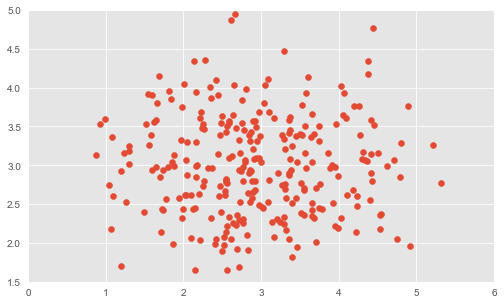

,Тест,Прогноз
827,1.862875,1.983222
699,1.797133,2.975625
891,3.513742,2.388499
385,4.200930,3.762486
154,2.275182,4.359480
...,...,...
0,1.857143,3.039999
721,2.869846,2.931872
66,2.538869,2.620780
522,2.250822,3.532245


In [15]:
pred_test = model.predict(X_test).flatten()
pred = pd.DataFrame({'Тест': Y_test, 'Прогноз': pred_test})

plt.figure(figsize = (10, 5))
plt.style.use('ggplot')
a = plt.axes(aspect='equal')
plt.scatter(Y_test, pred_test)
plt.xlim(0, 6)
plt.ylim(1.5, 5)
plt.show()

pred

In [16]:
models_path = 'model/'
model.save(models_path + '/model/')

INFO:tensorflow:Assets written to: model//model/assets
